In [1]:
%reset
%matplotlib inline
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.colors as colors

class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

## Reading in data. Experiment 24 is new reference.
## 25 has 0.05Pa winds and 29 has 0.1Pa winds.

In [3]:
# %cd /work0/eay/MITgcm_data/Experiment7/
# file7_1 = nc.Dataset('Salt.nc')
# file7_2 = nc.Dataset('U.nc')
# file7_3 = nc.Dataset('V.nc')
# NX7 = 600
# NY7 = 1000
# NZ7 = 120

# xq7 = (file7_1.variables['X'][:])
# yq7 = (file7_1.variables['Y'][:])
# zl7 = (file7_1.variables['Z'][:])
# Time7 = file7_1.variables['T'][:]
# print(Time7.shape)

# xqmat7=np.tile(xq7,(NY7,1))
# yqmat7=np.tile(yq7,(NX7,1))
# yqmat7=np.transpose(yqmat7)
# print(yqmat7.shape)
# print(xqmat7.shape)
# %cd /work0/eay/MITgcm_data/

In [4]:
%cd /work0/eay/MITgcm_data/Experiment24/
file24_1 = nc.Dataset('Salt.nc')
file24_2 = nc.Dataset('U.nc')
file24_3 = nc.Dataset('V.nc')
file24_4 = nc.Dataset('Eta.nc')
NX = 600
NY= 1000
NZ = 120

xq24 = (file24_1.variables['X'][:])
yq24 = (file24_1.variables['Y'][:])
zl24 = (file24_1.variables['Z'][:])
Time24 = file24_1.variables['T'][:]
print(Time24.shape)

xqmat24=np.tile(xq24,(NY,1))
yqmat24=np.tile(yq24,(NX,1))
yqmat24=np.transpose(yqmat24)

%cd /work0/eay/MITgcm_data/

/work0/eay/MITgcm_data/Experiment24
(150,)
/work0/eay/MITgcm_data


In [5]:
%cd /work0/eay/MITgcm_data/Experiment25/
file25_1 = nc.Dataset('Salt.nc')
file25_2 = nc.Dataset('U.nc')
file25_3 = nc.Dataset('V.nc')

xq25 = (file25_1.variables['X'][:])
yq25 = (file25_1.variables['Y'][:])
zl25 = (file25_1.variables['Z'][:])
Time25 = file25_1.variables['T'][:]


xqmat25=np.tile(xq25,(NY,1))
yqmat25=np.tile(yq25,(NX,1))
yqmat25=np.transpose(yqmat25)

%cd /work0/eay/MITgcm_data/

/work0/eay/MITgcm_data/Experiment25
/work0/eay/MITgcm_data


In [6]:
%cd /work0/eay/MITgcm_data/Experiment29/
file29_1 = nc.Dataset('Salt.nc')
file29_2 = nc.Dataset('U.nc')
file29_3 = nc.Dataset('V.nc')

xq29 = (file29_1.variables['X'][:])
yq29 = (file29_1.variables['Y'][:])
zl29 = (file29_1.variables['Z'][:])
Time29 = file29_1.variables['T'][:]


xqmat29=np.tile(xq29,(NY,1))
yqmat29=np.tile(yq29,(NX,1))
yqmat29=np.transpose(yqmat29)

%cd /work0/eay/MITgcm_data/

/work0/eay/MITgcm_data/Experiment29
/work0/eay/MITgcm_data


In [53]:
%cd /work0/eay/MITgcm_data/Experiment32/
%ls
NX = 600
NY= 1000
NZ = 120
depth = nc.Dataset('grid.nc').variables['Depth'][:]
file32_1 = nc.Dataset('Salt.nc')
file32_2 = nc.Dataset('U.nc')
file32_3 = nc.Dataset('V.nc')
file32_4 = nc.Dataset('Eta.nc')

xq32 = (file32_1.variables['X'][:])
yq32 = (file32_1.variables['Y'][:])
zl32 = (file32_1.variables['Z'][:])
Time32 = file32_1.variables['T'][:]


xqmat32=np.tile(xq32,(NY,1))
yqmat32=np.tile(yq32,(NX,1))
yqmat32=np.transpose(yqmat32)

%cd /work0/eay/MITgcm_data/
print(depth[100,400])

/work0/eay/MITgcm_data/Experiment32
Analysis.ipynb  grid.nc  Temp.nc         VideoSalt.gif      video-xz.ipynb
data            readme   U.nc            VideoVelocity.gif  V.nc
Eta.nc          Salt.nc  Videofresh.gif  video-xy.ipynb     W.nc
/work0/eay/MITgcm_data
25.0


In [18]:
#Reading in u,v velocities and averaging over the first/last 25 time steps, corresponds to 12.5 hours.
ix = 400 #40.05km in x
iy = 100 #10.05km in y, originally used 200
#U7 = np.nanmean(file7_2['U'][125:150,:,iy,ix],axis=0);
#V7 = np.nanmean(file7_3['V'][125:150,:,iy,ix],axis=0);
#U7.shape

# U24 = np.nanmean(file24_2['U'][125:,:,iy,ix],axis=0);
# V24 = np.nanmean(file24_3['V'][125:,:,iy,ix],axis=0);

# U25 = np.nanmean(file25_2['U'][125:,:,iy,ix],axis=0);
# V25 = np.nanmean(file25_3['V'][125:,:,iy,ix],axis=0);

# U29 = np.nanmean(file29_2['U'][85:,:,iy,ix],axis=0); #this one crashes at ts=110.
# V29 = np.nanmean(file29_3['V'][85:,:,iy,ix],axis=0);


U32 = np.nanmean(file32_2['U'][125:,:,iy,ix],axis=0);
V32 = np.nanmean(file32_3['V'][125:,:,iy,ix],axis=0);

In [19]:
U32.shape

(250,)

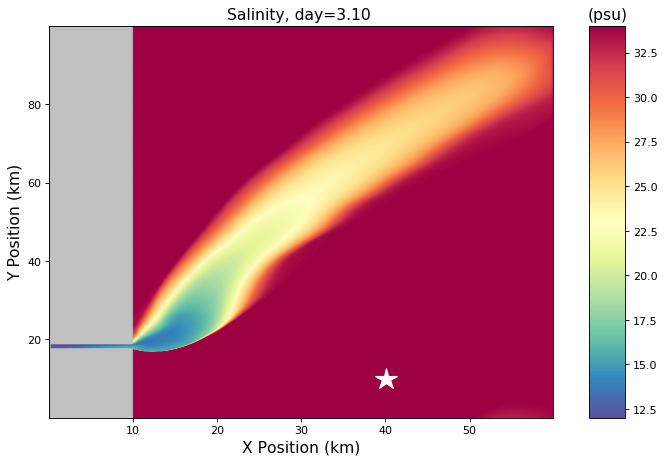

In [21]:
#Plotting surface salinity
Salt = file32_1.variables['S'][149,0,:,:]
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])


quad1 = ax1.pcolormesh(xq32/1000,yq32/1000,Salt,cmap='Spectral_r',vmin=12.,vmax=34.,shading='gouraud')
quad1.cmap.set_under('silver')
#ax1.set_xlim(0,30)
ax1.plot(xq32[ix]/1000,yq32[iy]/1000,'*w',Markersize=20)
#ax1.plot(xq24[250]/1000,yq24[iy]/1000,'*c',Markersize=20)
#ax1.plot(xq24[300]/1000,yq24[iy]/1000,'*c',Markersize=20)
#ax1.plot(xq24[350]/1000,yq24[iy]/1000,'*c',Markersize=20)
#ax1.plot(xq24[450]/1000,yq24[iy]/1000,'*c',Markersize=20)
#ax1.plot(xq24[500]/1000,yq24[iy]/1000,'*c',Markersize=20)

ax1.set_title('Salinity, day=%04.2f ' %(149/48.), fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('X Position (km)',fontsize=14)
ax1.set_ylabel('Y Position (km)',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('(psu)', fontsize=14)
plt.show()

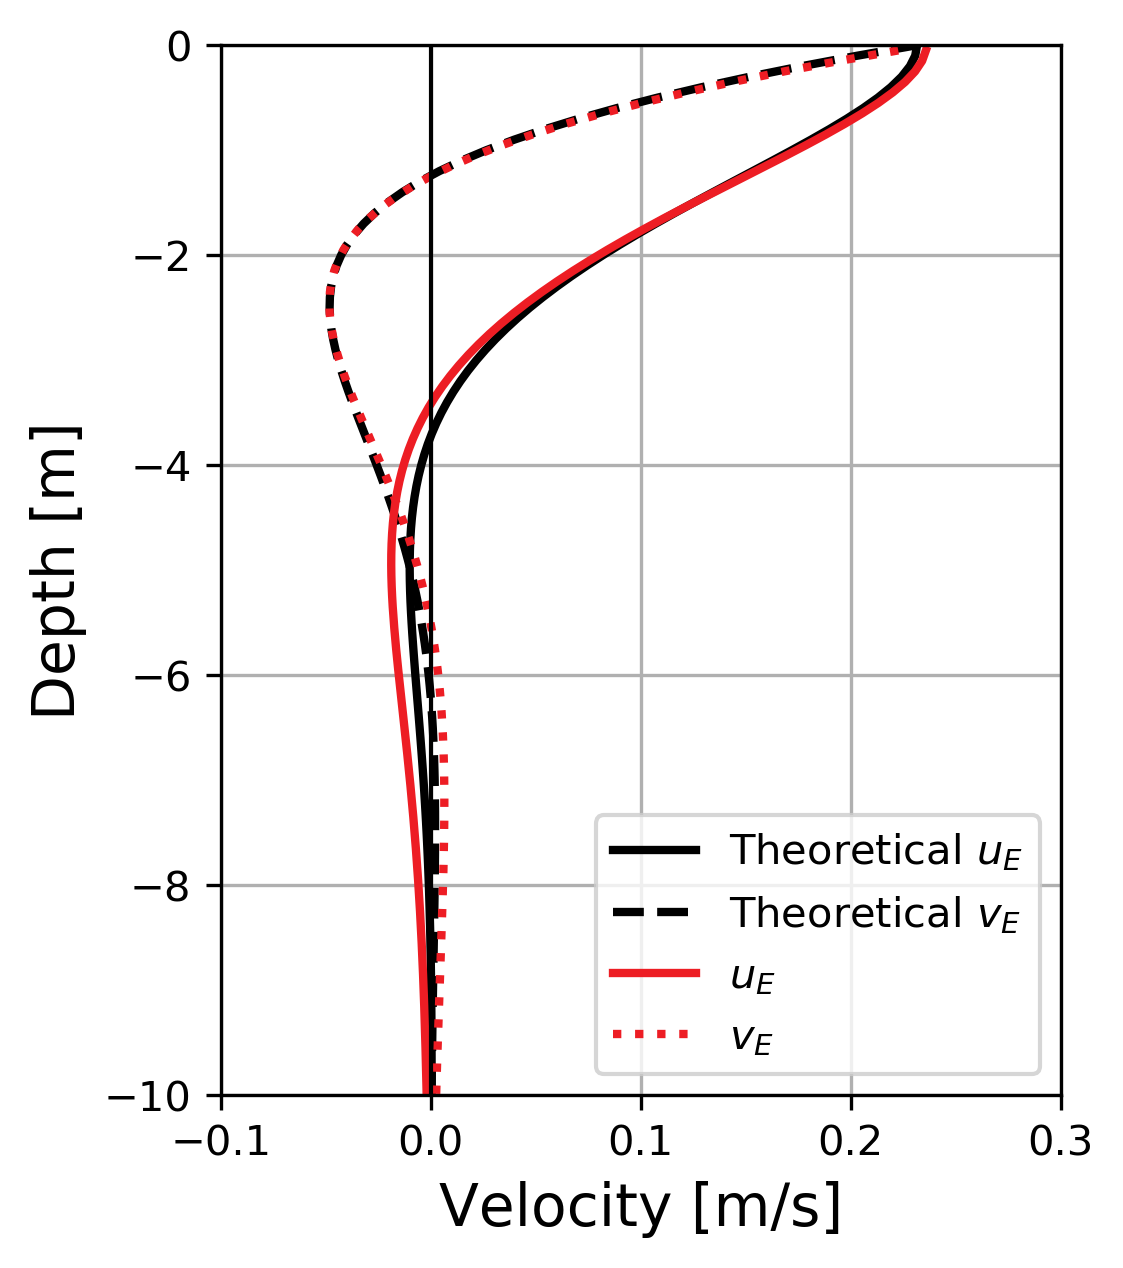

In [72]:
tau=0.03;
A_v=1.e-4;
f=8.e-5;
rho=1024;
z=np.linspace(-10,0,101);
V_0=tau/(rho*(A_v*f)**0.5);
D_E=((2*A_v)/f)**0.5;
u_E=V_0*np.cos((np.pi/4)+(z/D_E))*np.exp(z/D_E);
v_E=V_0*np.sin((np.pi/4)+(z/D_E))*np.exp(z/D_E);


fig = plt.figure(figsize=(4, 5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)

plt.plot(u_E,z,'-k',linewidth=2)
plt.plot(v_E,z,'--k',linewidth=2)

# plt.plot(U7-U7[100],zl7,'-c',linewidth=3)
# plt.plot(V7-V7[100],zl7,':c',linewidth=3)


# plt.plot(U24-U24[100],zl24,'-r',linewidth=3)
# plt.plot(V24-V24[100],zl24,':r',linewidth=3)

# plt.plot(U25-U25[100],zl25,'-r',linewidth=3)
# plt.plot(V25-V25[100],zl25,':r',linewidth=3)

# plt.plot(U29-U29[100],zl29,'-r',linewidth=3)
# plt.plot(V29-V29[100],zl29,':r',linewidth=3)

plt.plot(U32-U32[125],zl32,'-',color='#ED1D24',linewidth=2)
plt.plot(V32-V32[125],zl32,':',color='#ED1D24',linewidth=2)

plt.plot([0,0],[5,-15],color='k',linewidth=1)
plt.grid('on')
plt.xlabel('Velocity [m/s]',fontsize=14);
plt.ylabel('Depth [m]',fontsize=14);
plt.ylim([-10,0])
plt.xlim([-.1,.3])
#plt.title('Vertical profile of Ekman velocity, last 12.5 hours')
plt.legend(['Theoretical $u_{E}$','Theoretical $v_{E}$','$u_{E}$','$v_{E}$'],loc='lower right');


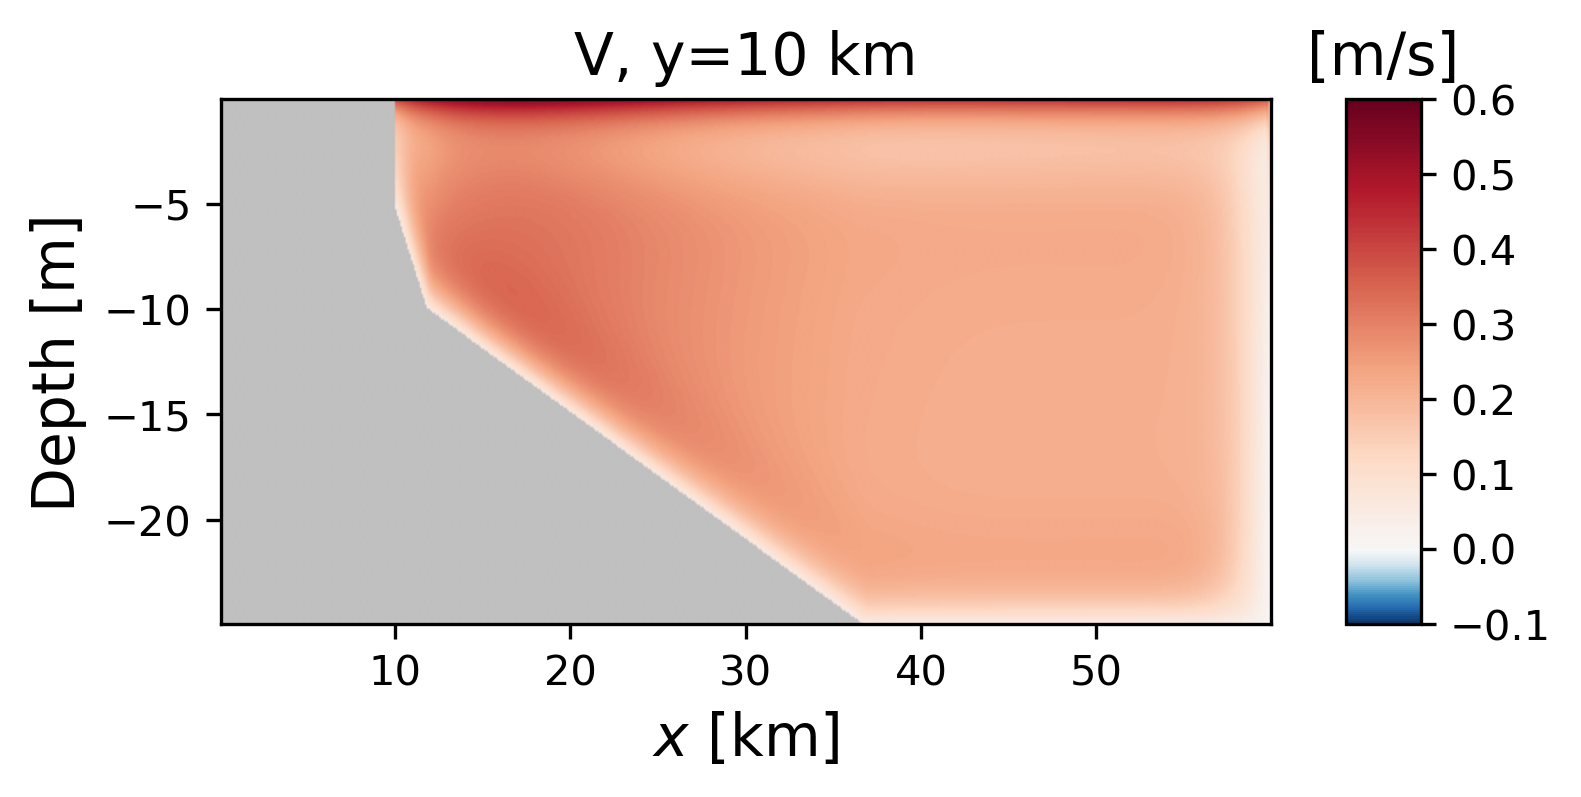

In [49]:
V_slice = np.nanmean(file32_3['V'][125:150,:,iy,:],axis=0);
mask = file32_1.variables['S'][0,:,iy,:]; 

V_slice[mask==0]=np.nan;
fig = plt.figure(figsize=(5, 2.5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])


quad1 = ax1.pcolormesh(xq32/1000,zl32,V_slice,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-.1,vmax=.6,shading='gouraud')
# #ax1.set_xlim(0,30)
quad1.cmap.set_under('silver')

ax1.set_title('V, y=%i km'%(yq32[iy]/1000), fontsize=14)
ax1.set_facecolor((0.72, 0.72, 0.72))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('Depth [m]',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('[m/s]', fontsize=14)
plt.show()

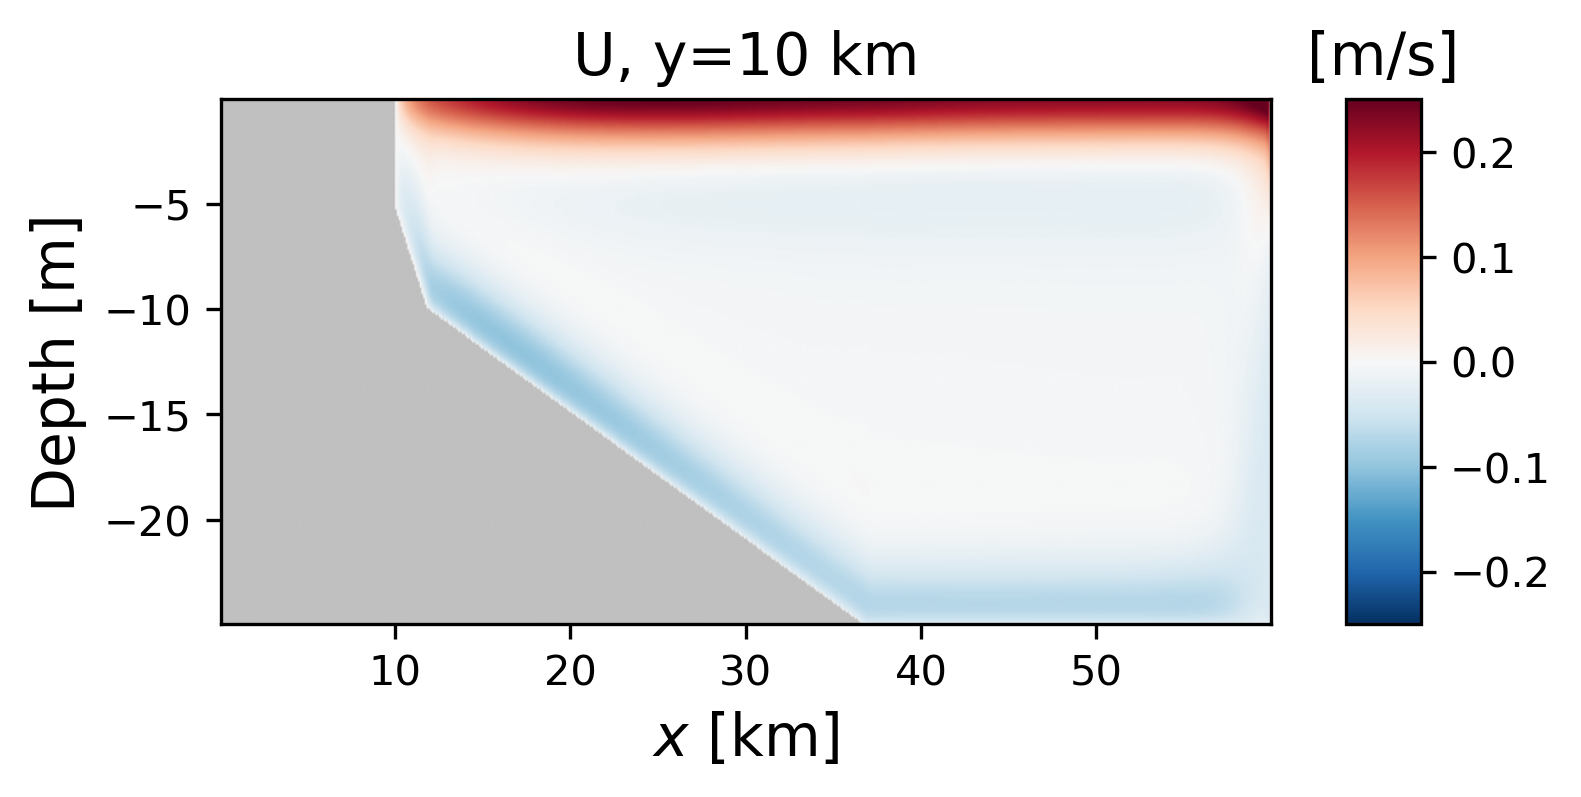

In [43]:
U_slice = np.nanmean(file32_2['U'][125:150,:,iy,:-1],axis=0);
mask = file32_1.variables['S'][0,:,iy,:]; 

U_slice[mask==0]=np.nan;
fig = plt.figure(figsize=(5, 2.5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])


quad1 = ax1.pcolormesh(xq32/1000,zl32,U_slice,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-.25,vmax=.25,shading='gouraud')
# #ax1.set_xlim(0,30)
quad1.cmap.set_under('silver')

ax1.set_title('U, y=%i km'%(yq32[iy]/1000), fontsize=14)
ax1.set_facecolor((0.72, 0.72, 0.72))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('Depth [m]',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('[m/s]', fontsize=14)
plt.show()

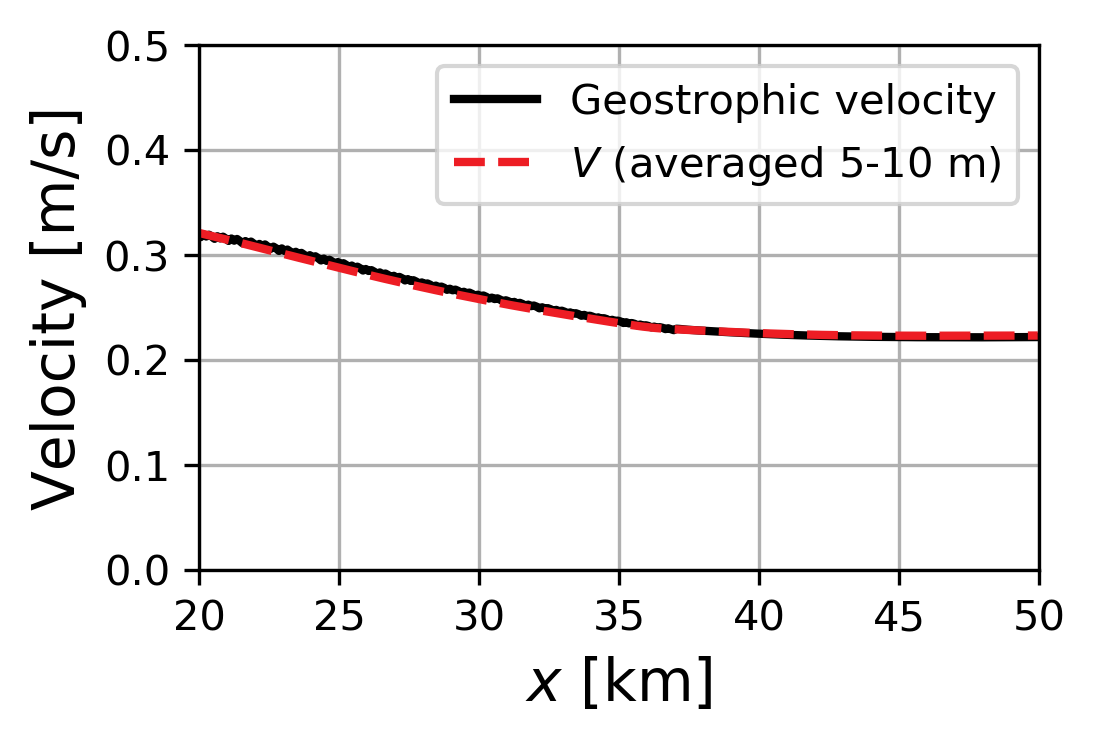

In [77]:
Eta= np.nanmean(file32_4['Eta'][125:150,200,100:500],axis=0);
V5_10=np.nanmean(np.nanmean(file32_3['V'][125:150,50:100,iy,100:500],axis=0),axis=0);
V_geo = (np.diff(Eta)/100)*9.81/(8.0e-5)

fig = plt.figure(figsize=(4, 2.5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)

plt.plot(xq32[101:500]/1000,V_geo,'-k',linewidth=2)
plt.plot(xq32[100:500]/1000,V5_10,'--',color='#ED1D24',linewidth=2)

plt.grid('on')
ax1.set_xlabel('$x$ [km]',fontsize=14)
plt.ylabel('Velocity [m/s]',fontsize=14);
plt.xlim([20,50])
plt.ylim([0,0.5])

plt.legend(['Geostrophic velocity','$V$ (averaged 5-10 m)']);


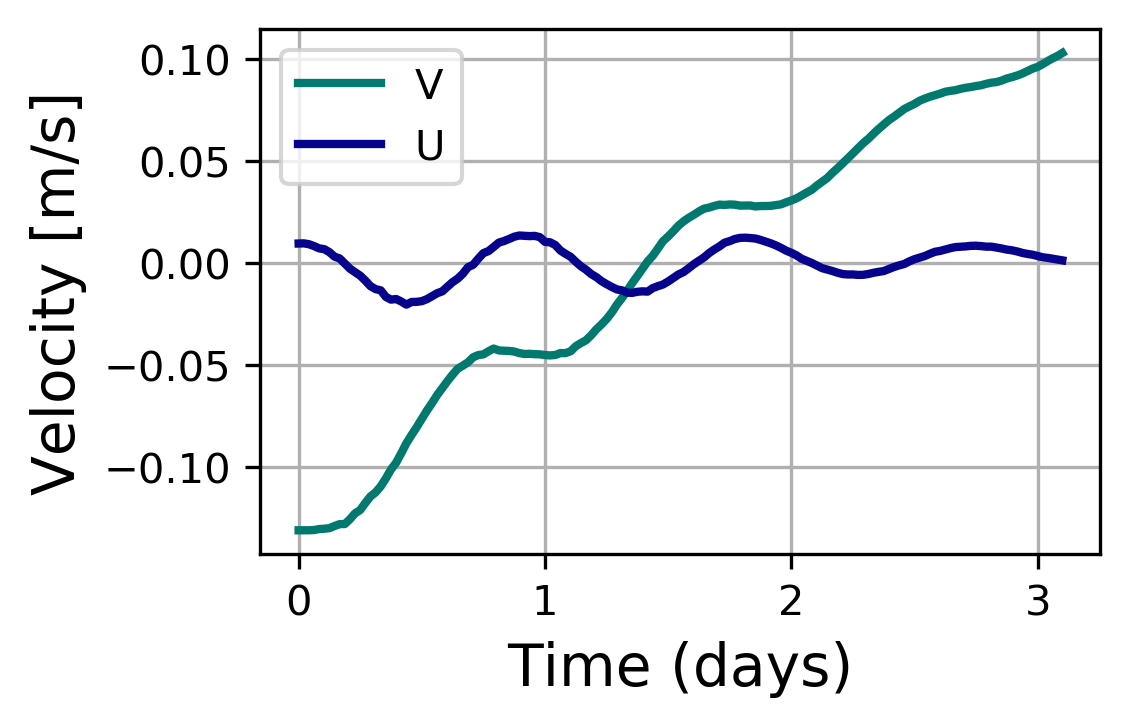

In [106]:
V_ie=(file32_3['V'][:,125,iy,ix])-np.nanmean(file32_3['V'][:,125,iy,ix],axis=0);
U_ie =(file32_2['U'][:,125,iy,ix])-np.nanmean(file32_2['U'][:,125,iy,ix],axis=0);
Time=file32_3['T'][:]/(3600*24)

fig = plt.figure(figsize=(4, 2.5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)

plt.plot(Time,V_ie,'-',color='#01796F',linewidth=2,label='V')
plt.plot(Time,U_ie,'-',color='#06038D',linewidth=2,label='U')

plt.grid('on')
ax1.set_xlabel('Time (days)',fontsize=14)
plt.ylabel('Velocity [m/s]',fontsize=14);
#plt.xlim([20,50])
#plt.ylim([0,0.5])

plt.legend();

In [96]:
V_ie.shape

(150,)

In [86]:
file32_3['T'][:]

masked_array(data=[     0.,   1800.,   3600.,   5400.,   7200.,   9000.,
                    10800.,  12600.,  14400.,  16200.,  18000.,  19800.,
                    21600.,  23400.,  25200.,  27000.,  28800.,  30600.,
                    32400.,  34200.,  36000.,  37800.,  39600.,  41400.,
                    43200.,  45000.,  46800.,  48600.,  50400.,  52200.,
                    54000.,  55800.,  57600.,  59400.,  61200.,  63000.,
                    64800.,  66600.,  68400.,  70200.,  72000.,  73800.,
                    75600.,  77400.,  79200.,  81000.,  82800.,  84600.,
                    86400.,  88200.,  90000.,  91800.,  93600.,  95400.,
                    97200.,  99000., 100800., 102600., 104400., 106200.,
                   108000., 109800., 111600., 113400., 115200., 117000.,
                   118800., 120600., 122400., 124200., 126000., 127800.,
                   129600., 131400., 133200., 135000., 136800., 138600.,
                   140400., 142200., 144000., 14580

In [50]:
# V_slice = np.nanmean(file24_3['V'][125:150,:,iy,:],axis=0);
# mask = file24_1.variables['S'][0,:,iy,:]; 

# V_slice[mask==0]=np.nan;
# fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
# ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
# ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])


# quad1 = ax1.pcolormesh(xq24/1000,zl24,V_slice,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-.2,vmax=.8,shading='gouraud')
# # #ax1.set_xlim(0,30)
# quad1.cmap.set_under('silver')

# ax1.set_title('Exp. 24 V, y=%i km, averaged over last 12.4 hours'%(yq24[iy]/1000), fontsize=14)
# ax1.set_facecolor((0.72, 0.72, 0.72))
# ax1.set_xlabel('$x$ [km]',fontsize=14)

# ax1.set_ylabel('Depth [m]',fontsize=14)
# cb1 = fig.colorbar(quad1,ax2)
# plt.title('[m/s]', fontsize=14)
# plt.show()

In [51]:
iy

100

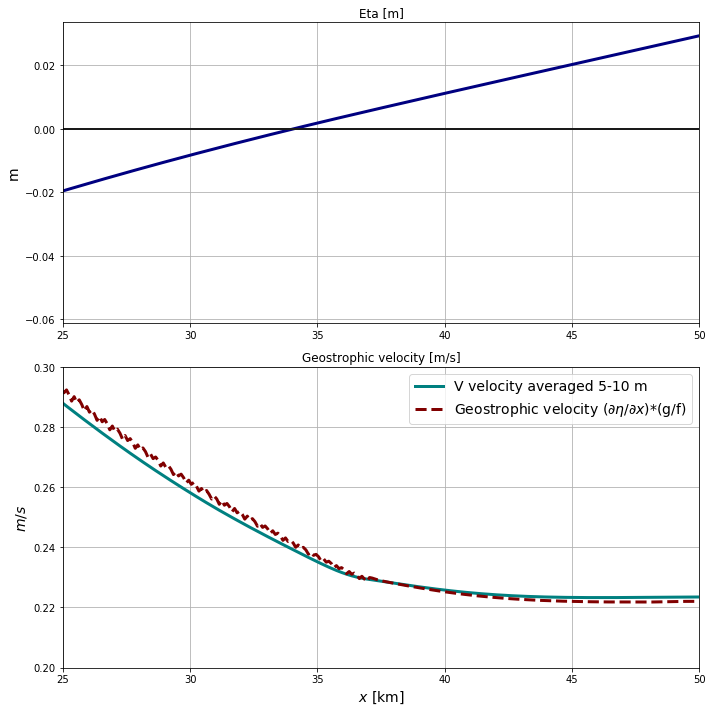

In [56]:
Eta= np.nanmean(file32_4['Eta'][125:150,200,100:500],axis=0);
V5_10=np.nanmean(np.nanmean(file32_3['V'][125:150,50:100,iy,100:500],axis=0),axis=0);
V_geo = (np.diff(Eta)/100)*9.81/(8.0e-5)


fig, axes = plt.subplots(nrows=2,figsize=(10, 10))

axes[0].plot(xq32[100:500]/1000,Eta,'-',color=[0,0,0.5],linewidth=3)
axes[0].plot(xq32[100:500]/1000,xq32[100:500]*0,'-',color=[0.1,0.1,0.1],linewidth=2)
axes[0].grid()
axes[0].set_xlim([25,50])

line1=axes[1].plot(xq32[100:500]/1000,V5_10,'-',color=[0,0.5,0.5],linewidth=3)
line2=axes[1].plot(xq32[101:500]/1000,V_geo,'--',color=[0.5,0,0],linewidth=3)
axes[1].plot(xq32[100:500]/1000,xq32[100:500]*0,'-',color=[0.1,0.1,0.1],linewidth=2)


axes[1].grid()
axes[1].set_xlim([25,50])
axes[1].set_ylim([.2,.3])

axes[0].set_title('Eta [m]')
axes[0].set_ylabel('m',fontsize=14)
axes[1].legend(['V velocity averaged 5-10 m','Geostrophic velocity $(\partial\eta/\partial x$)*(g/f)'],fontsize=14)

axes[1].set_title('Geostrophic velocity [m/s]')
axes[1].set_xlabel('$x$ [km]',fontsize=14)
axes[1].set_ylabel('$m/s$',fontsize=14)


plt.tight_layout()


In [115]:
Eta.shape
test= np.diff(Eta)/100
test.shape

(399,)

In [117]:
test[0:5]


masked_array(data=[1.6200169739022385e-06, 2.8420240596460644e-06,
                   3.630183528002817e-06, 4.233047548041213e-06,
                   4.768334292748477e-06],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [116]:
Eta[0:5]

masked_array(data=[-0.05702724, -0.05686524, -0.05658104, -0.05621802,
                   -0.05579471],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

(0.00016200000000000242,)

In [33]:
ix

400

NameError: name 'yq18' is not defined

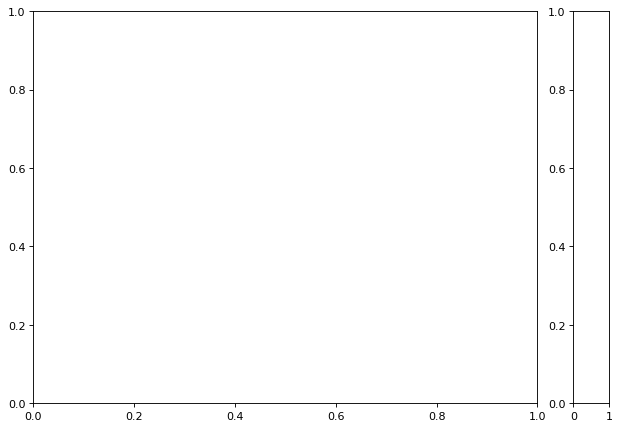

In [55]:
U18_slice = np.nanmean(file24_2['U'][125:150,:,:,ix],axis=0);
mask18 = file24_1.variables['S'][0,:,:,ix]; U18_slice[mask18==0]=np.nan;
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])


quad1 = ax1.pcolormesh(yq18/1000,zl18,U18_slice,norm=MidpointNormalize(midpoint=0.),cmap='RdBu_r',vmin=-.25,vmax=.25,shading='gouraud')
# #ax1.set_xlim(0,30)
quad1.cmap.set_under('silver')

ax1.set_title('Exp. 18 U, x=%i km, averaged over last 12.4 hours'%(xq18[ix]/1000), fontsize=14)
ax1.set_facecolor((0.72, 0.72, 0.72))
ax1.set_xlabel('$y$ [km]',fontsize=14)
ax1.set_ylabel('Depth [m]',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('[m/s]', fontsize=14)
plt.show()